In [60]:
import pandas as pd

file_path = "~/Downloads/Iphone_Dataset.csv"
df = pd.read_csv(file_path)

print(df.head())
print(df.info())
print(df.describe())

   Year  No_of_iPhone_Users  No_of_iPhone_Users_USA  \
0  2023          1460000000               153000000   
1  2022          1360000000               149000000   
2  2021          1230000000               141000000   
3  2020          1000000000               138000000   
4  2019           948000000               131000000   

   Percentage_of_iPhone_Users  No_of_iPhone_Sold  No_of_iPhone_Sold_USA  \
0                       58.33          234600000                    NaN   
1                       48.70          226400000            124700000.0   
2                       46.90          235700000            116300000.0   
3                       45.30          206100000            113500000.0   
4                       45.20          191000000            105200000.0   

   iOS_Market_Share  Android_Market_Share  
0             58.10                 41.46  
1             56.74                 42.94  
2             58.58                 41.11  
3             59.54                 40.20 

In [61]:
if df.isna().sum().any():
    df.fillna(df.mean(), inplace=True)

In [62]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

features_to_scale = ['No_of_iPhone_Users', 'No_of_iPhone_Users_USA', 
                     'Percentage_of_iPhone_Users', 'No_of_iPhone_Sold', 
                     'No_of_iPhone_Sold_USA', 'Android_Market_Share']


scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

print(df.head())

   Year  No_of_iPhone_Users  No_of_iPhone_Users_USA  \
0  2023            1.654962                1.207853   
1  2022            1.413471                1.095495   
2  2021            1.099531                0.870778   
3  2020            0.544100                0.786509   
4  2019            0.418524                0.589882   

   Percentage_of_iPhone_Users  No_of_iPhone_Sold  No_of_iPhone_Sold_USA  \
0                    3.136870           0.945431               0.000000   
1                    0.629353           0.747585               1.507316   
2                    0.160658           0.971972               1.126437   
3                   -0.255959           0.257794               0.999477   
4                   -0.281998          -0.106533               0.623133   

   iOS_Market_Share  Android_Market_Share  
0             58.10             -0.778162  
1             56.74             -0.057133  
2             58.58             -0.948675  
3             59.54             -1.392010 

In [63]:
X = df.drop(columns=['iOS_Market_Share'])
y = df['iOS_Market_Share']

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))  # Input layer with the same shape
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for regression

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,625 (10.25 KB)

 Trainable params: 2,625 (10.25 KB)

 Non-trainable params: 0 (0.00 B)

In [66]:
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=1)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - loss: 427.9474 - mae: 20.5651 - val_loss: 624.6602 - val_mae: 24.8356
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 727.5219 - mae: 26.8823 - val_loss: 268.7072 - val_mae: 16.1506
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 336.1447 - mae: 18.2006 - val_loss: 22.4680 - val_mae: 3.8141
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8.0232 - mae: 2.3140 - val_loss: 365.0252 - val_mae: 18.8963
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 288.0651 - mae: 16.8243 - val_loss: 424.7141 - val_mae: 20.4149
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 341.5713 - mae: 18.3461 - val_loss: 149.7968 - val_mae: 11.9122
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 102.0554 - mae: 9.8553 - val_loss: 7.9184 - val_mae: 2.7994
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 10.2665 - mae: 2.6814 - val_loss: 105.4516 - val_mae: 9.8826
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms

In [67]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print("Test Mean Absolute Error:", test_mae)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.6507 - mae: 2.0226
Test Mean Absolute Error: 2.022632598876953


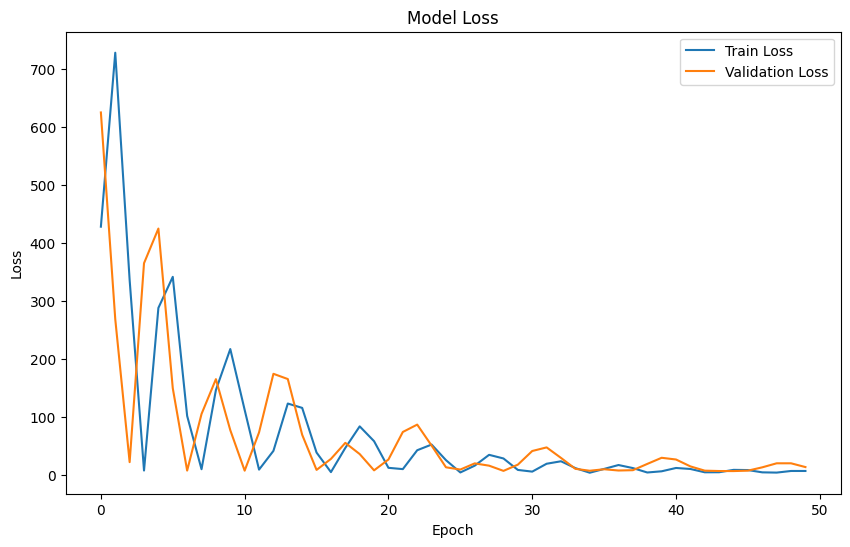

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [70]:
y_pred = model.predict(X_test).flatten()

for pred, actual in zip(y_pred, y_test):
    print(f"Predicted: {pred}, Actual: {actual}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predicted: 53.200836181640625, Actual: 55.093636363636364
Predicted: 53.47821044921875, Actual: 52.3
Predicted: 55.103111267089844, Actual: 58.1
